In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [31]:
rcs= pd.read_csv('Fino Dataset- Aayush - rcsf.csv')

In [32]:
rcs.head()

,Product,Date,Campaign Name,Target Audience,Message,Total,Delivered,Read,Failed,Pending,Status
0,Shubh Savings Account,9th Nov,Shubh Renewal Eng,Non Renewal Customers,NaN,4133,3870,1310,2,261,Completed
1,Shubh Savings Account,9th Nov,Shubh Renewal Hindi,Non Renewal Customers,NaN,28118,26191,8713,30,1897,Completed
2,FinoPay,10th Nov,Dhanteras_Digi_Gold,Active Customers,NaN,49949,47461,16137,104,2384,Completed
3,Shubh Savings Account,13th Nov,Shubh Renewal Eng,Non Renewal Customers,NaN,3933,3683,978,4,246,Completed
4,Shubh Savings Account,13th Nov,Shubh Renewal Hin,Non Renewal Customers,NaN,26841,24800,5792,36,2005,Completed


In [33]:
rcs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Product          60 non-null     object
 1   Date             60 non-null     object
 2   Campaign Name    60 non-null     object
 3   Target Audience  60 non-null     object
 4   Message          50 non-null     object
 5   Total            60 non-null     int64 
 6   Delivered        60 non-null     int64 
 7   Read             60 non-null     int64 
 8   Failed           60 non-null     int64 
 9   Pending          60 non-null     int64 
 10  Status           60 non-null     object
dtypes: int64(5), object(6)
memory usage: 5.3+ KB


In [34]:
rcs.describe()

,Total,Delivered,Read,Failed,Pending
count,60.000000,60.000000,60.000000,60.00000,60.000000
mean,17687.333333,16408.633333,4505.383333,782.85000,495.850000
std,16067.013895,15070.905018,4602.641530,2877.10328,1012.308887
min,77.000000,3.000000,0.000000,0.00000,-3357.000000
25%,2672.250000,2014.500000,673.500000,24.00000,0.000000
50%,17505.000000,15686.500000,3492.000000,51.50000,346.500000
75%,28784.750000,26288.750000,6390.250000,343.00000,1006.000000
max,89310.000000,80605.000000,22452.000000,20561.00000,3306.000000


In [35]:
check = 0
for index, row in rcs.iterrows():
    if row['Total'] == row['Delivered'] + row['Failed'] + row['Pending']:
        check += 1

print(check)


60


In [36]:
rcs['Rate']=(rcs['Read']/rcs["Delivered"]*100)

In [37]:
rcs['Rate']
print(rcs['Rate'].mean())

27.000843969706814


view the data grouped by day

In [38]:
rcs['Campaign Name'].nunique()

35

In [39]:
rcs.head(12)

,Product,Date,Campaign Name,Target Audience,Message,Total,Delivered,Read,Failed,Pending,Status,Rate
0,Shubh Savings Account,9th Nov,Shubh Renewal Eng,Non Renewal Customers,NaN,4133,3870,1310,2,261,Completed,33.850129
1,Shubh Savings Account,9th Nov,Shubh Renewal Hindi,Non Renewal Customers,NaN,28118,26191,8713,30,1897,Completed,33.267153
2,FinoPay,10th Nov,Dhanteras_Digi_Gold,Active Customers,NaN,49949,47461,16137,104,2384,Completed,34.000548
3,Shubh Savings Account,13th Nov,Shubh Renewal Eng,Non Renewal Customers,NaN,3933,3683,978,4,246,Completed,26.554439
4,Shubh Savings Account,13th Nov,Shubh Renewal Hin,Non Renewal Customers,NaN,26841,24800,5792,36,2005,Completed,23.354839
5,FinoPay,15th Nov,100% cashback november_15thNov23_Mp,FinoPay Refer & Earn,NaN,33195,32201,10486,70,924,Completed,32.564206
6,FinoPay,16th Nov,RCS campaigns for Funding and VKYC_16thNov22_1,Non Funded Customers,NaN,10982,10229,2429,12,741,Completed,23.746212
7,FinoPay,20th Nov,rekyc through vkyc,ReKyc Pending Customers,NaN,20175,19027,4700,15,1133,Completed,24.701740
8,Bhavishya Account,23rd Nov,Bhavishya_newly_onboarded,Newly Onboarded Customers,NaN,24763,22795,6649,33,1935,Completed,29.168677
9,Bhavishya Account,23rd Nov,Bhavishya renewal,Renewal Pending Customers,NaN,14231,13301,3313,39,891,Completed,24.907902


In [41]:
from datetime import datetime

def convert_to_uniform_format(date):
    try:
        return pd.to_datetime(date).strftime('%d-%m-%Y')
    except (ValueError, OverflowError):
        parts = date.split()
        day = int(parts[0][:-2])
        month_name = parts[1]
        month_number = datetime.strptime(month_name, '%b').month
        return f'{day:02d}-{month_number:02d}-2023'

rcs['Date'] = rcs['Date'].apply(convert_to_uniform_format)




/var/folders/q_/dn720rf91691y39h0s_hr_280000gn/T/ipykernel_56910/2810799523.py:5: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  return pd.to_datetime(date).strftime('%d-%m-%Y')


In [42]:
rcs['Date']

0     09-11-2023
1     09-11-2023
2     10-11-2023
3     13-11-2023
4     13-11-2023
5     15-11-2023
6     16-11-2023
7     20-11-2023
8     23-11-2023
9     23-11-2023
10    12-09-2023
11    12-09-2023
12    13-12-2023
13    15-12-2023
14    15-12-2023
15    15-12-2023
16    18-12-2023
17    18-12-2023
18    18-12-2023
19    19-12-2023
20    19-12-2023
21    19-12-2023
22    19-12-2023
23    19-12-2023
24    19-12-2023
25    20-12-2023
26    20-12-2023
27    20-12-2023
28    21-12-2023
29    23-12-2023
30    23-12-2023
31    23-12-2023
32    23-12-2023
33    23-12-2023
34    23-12-2023
35    26-12-2023
36    27-12-2023
37    27-12-2023
38    27-12-2023
39    27-12-2023
40    27-12-2023
41    28-12-2023
42    28-12-2023
43    28-12-2023
44    29-12-2023
45    01-02-2024
46    01-03-2024
47    01-03-2024
48    01-03-2024
49    01-09-2024
50    01-09-2024
51    01-09-2024
52    17-01-2024
53    17-01-2024
54    19-01-2024
55    23-01-2024
56    23-01-2024
57    23-01-2024
58    23-01-20

In [43]:
from datetime import datetime

rcs['Date'] = pd.to_datetime(rcs['Date'], format='%d-%m-%Y')
rcs['Day'] = rcs['Date'].dt.strftime("%A")
print(rcs['Day'].value_counts())


Day
Tuesday      14
Wednesday    12
Thursday     10
Friday        9
Monday        6
Saturday      6
Sunday        3
Name: count, dtype: int64


In [45]:
Enagement_per_day = rcs.groupby('Day')['Rate'].mean().reset_index()
Enagement_per_day = Enagement_per_day.sort_values(by= 'Rate')

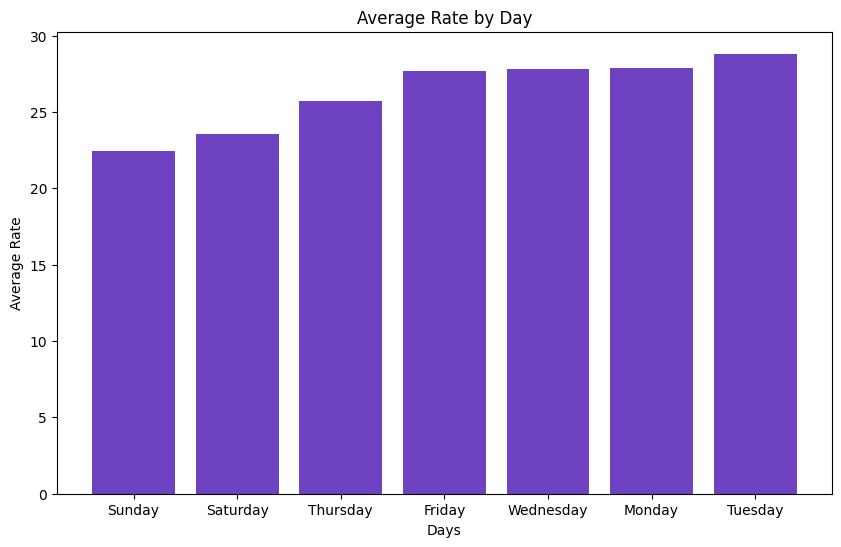

In [46]:
company_colors = ['#6610f2', '#6f42c1', '#e83e8c'] 
plt.figure(figsize=(10, 6))
plt.bar(Enagement_per_day['Day'], Enagement_per_day['Rate'], color=company_colors[1])
plt.title('Average Rate by Day')
plt.xlabel('Days')
plt.ylabel('Average Rate')
plt.show()


Why Friday has higher rate? Market closed? and only 6 campia

In [54]:
rcs['Target Audience'].unique()

# Assuming your DataFrame is named 'rcs'
rcs['Customer_Category'] = rcs['Target Audience'].apply(lambda x: 'Customer' if 'Customer' in x else 'Non-Customer')

# Display the updated DataFrame
print(rcs[['Target Audience', 'Customer_Category']])


                        Target Audience Customer_Category
0                 Non Renewal Customers          Customer
1                 Non Renewal Customers          Customer
2                      Active Customers          Customer
3                 Non Renewal Customers          Customer
4                 Non Renewal Customers          Customer
5                  FinoPay Refer & Earn      Non-Customer
6                  Non Funded Customers          Customer
7               ReKyc Pending Customers          Customer
8             Newly Onboarded Customers          Customer
9             Renewal Pending Customers          Customer
10                            Merchants      Non-Customer
11                            Merchants      Non-Customer
12                            Customers          Customer
13                            Customers          Customer
14                            Customers          Customer
15                            Merchants      Non-Customer
16            

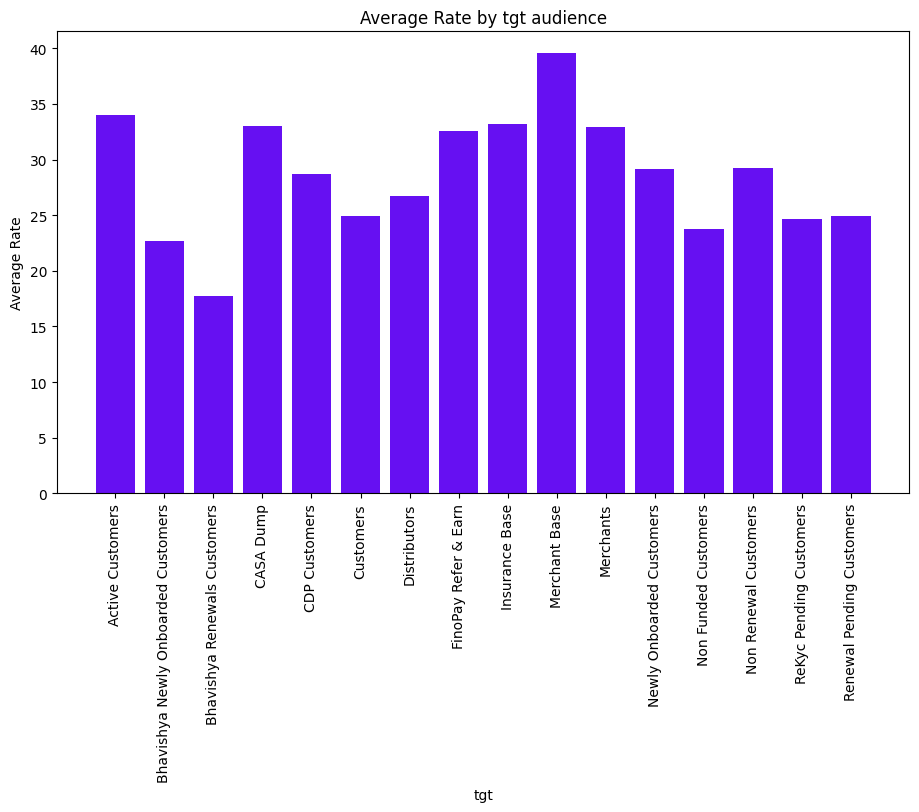

In [48]:
tgt_audience = rcs.groupby('Target Audience')['Rate'].mean().reset_index()
plt.figure(figsize=(11, 6))
plt.bar(tgt_audience['Target Audience'], tgt_audience['Rate'], color=company_colors[0])
plt.title('Average Rate by tgt audience')
plt.xlabel('tgt')
plt.xticks(rotation='vertical')
plt.ylabel('Average Rate')
plt.show()

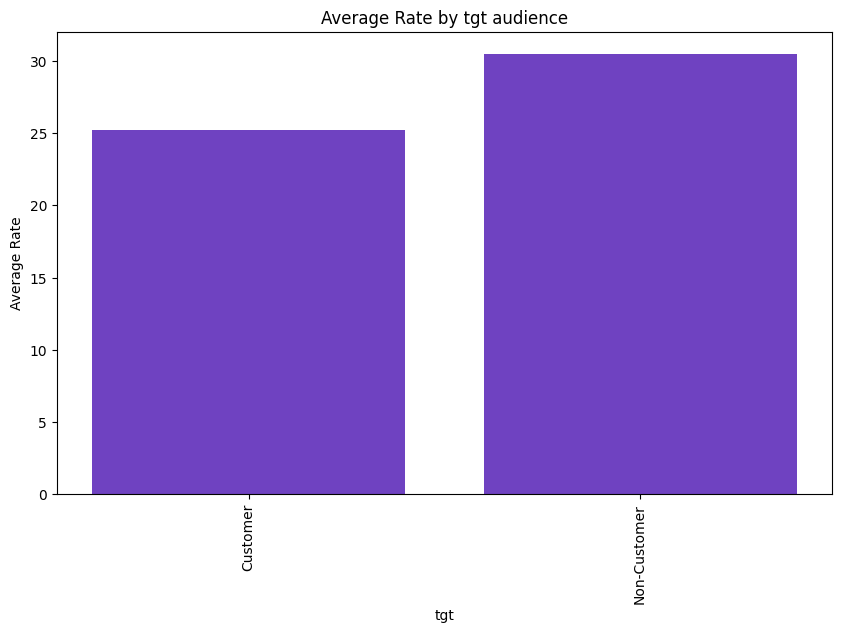

In [58]:
tgt_audience_cat = rcs.groupby('Customer_Category')['Rate'].mean().reset_index()
plt.figure(figsize=(10, 6))

plt.bar(tgt_audience_cat['Customer_Category'], tgt_audience_cat['Rate'], color=company_colors[1])
plt.title('Average Rate by tgt audience')
plt.xlabel('tgt')
plt.xticks(rotation='vertical')
plt.ylabel('Average Rate')
plt.show()

Text(0.5, 1.0, 'Count of different Tagret audience ')

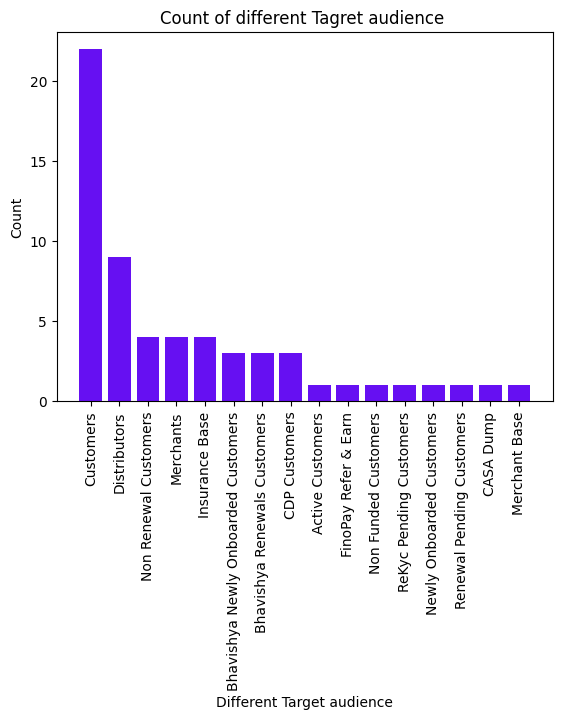

In [59]:
x=rcs['Target Audience'].value_counts()
plt.bar(x.index,x.values, color= company_colors[0])
plt.xlabel('Different Target audience')
plt.ylabel('Count')
plt.xticks(rotation='vertical')

plt.title('Count of different Tagret audience ')

In [60]:
rcs['Rate'].mean()

27.000843969706814

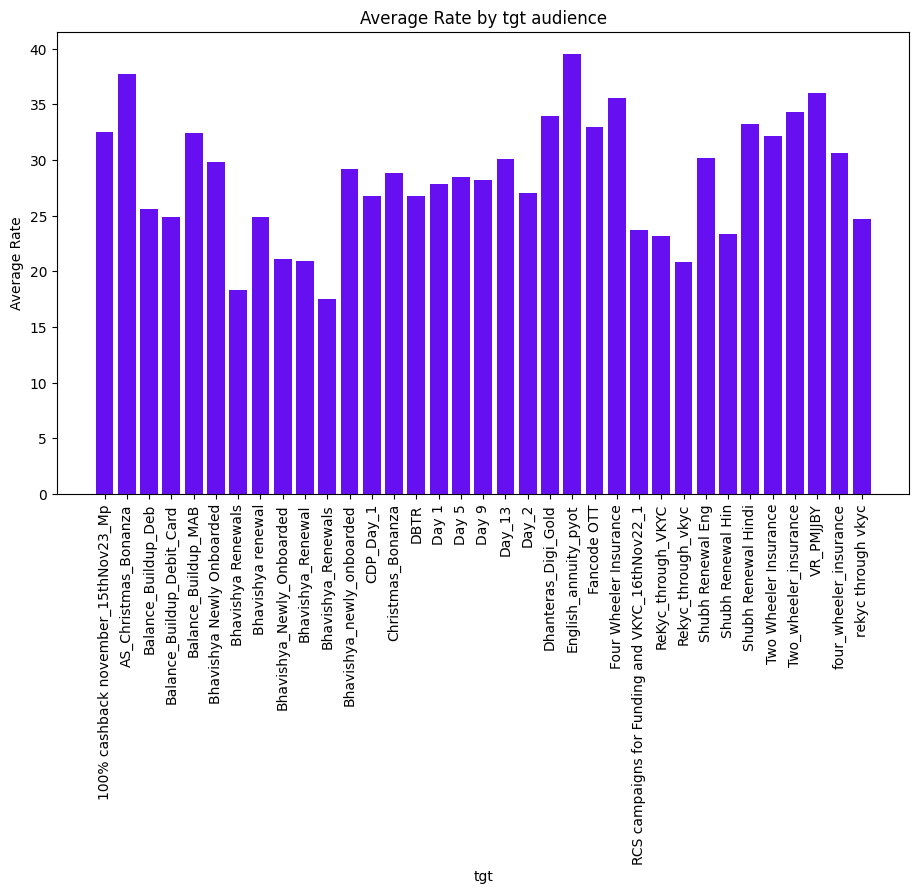

In [61]:
tgt_campaign = rcs.groupby('Campaign Name')[['Rate','Total']].mean().reset_index()
plt.figure(figsize=(11, 6))
plt.bar(tgt_campaign['Campaign Name'],tgt_campaign['Rate'], color=company_colors[0])
plt.title('Average Rate by tgt audience')
plt.xlabel('tgt')
plt.xticks(rotation='vertical')
plt.ylabel('Average Rate')
plt.show()

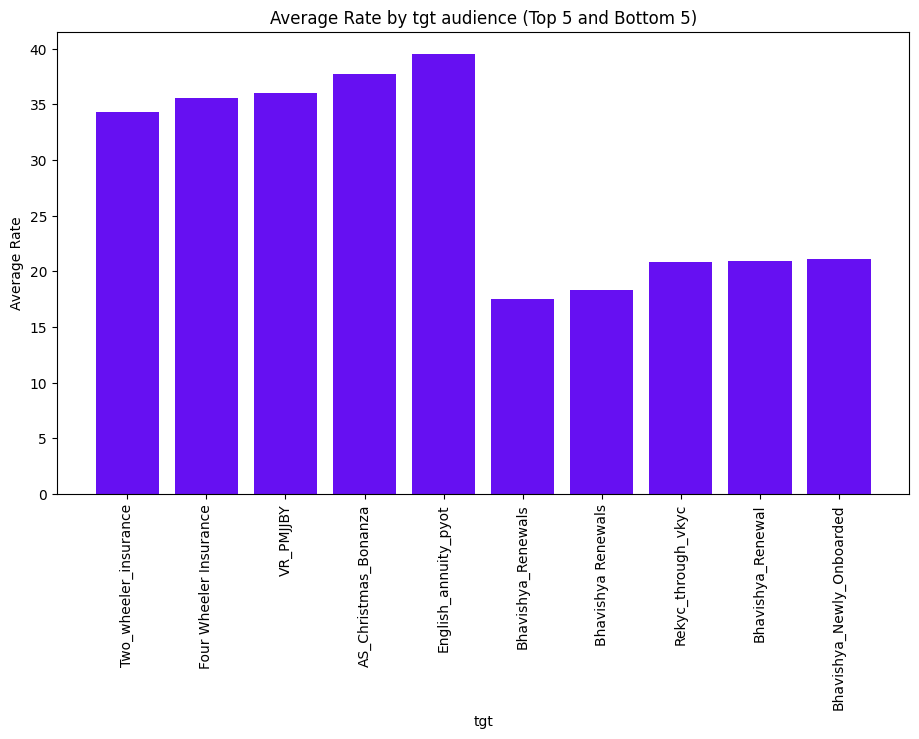

In [62]:
tgt_campaign_sorted = tgt_campaign.sort_values(by='Rate')

top_5 = tgt_campaign_sorted.tail(5)
bottom_5 = tgt_campaign_sorted.head(5)

top_bottom_5 = pd.concat([top_5, bottom_5])

plt.figure(figsize=(11, 6))
plt.bar(top_bottom_5['Campaign Name'], top_bottom_5['Rate'], color=company_colors[0])
plt.title('Average Rate by tgt audience (Top 5 and Bottom 5)')
plt.xlabel('tgt')
plt.xticks(rotation='vertical')
plt.ylabel('Average Rate')
plt.show()


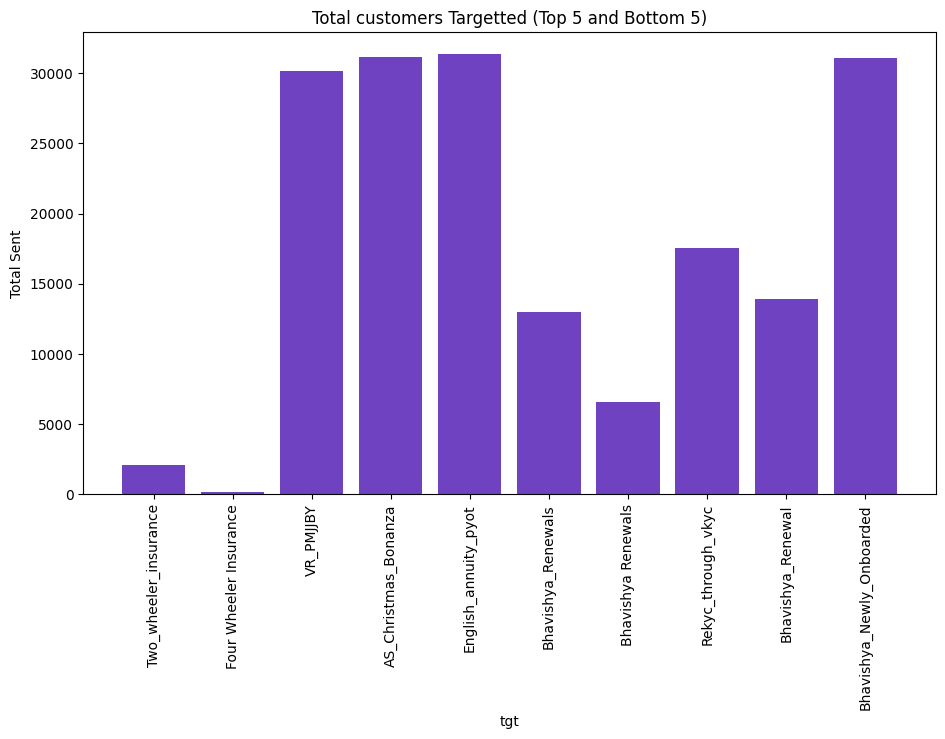

In [63]:
tgt_campaign_sorted = tgt_campaign.sort_values(by='Rate')

top_5 = tgt_campaign_sorted.tail(5)
bottom_5 = tgt_campaign_sorted.head(5)

top_bottom_5 = pd.concat([top_5, bottom_5])

plt.figure(figsize=(11, 6))
plt.bar(top_bottom_5['Campaign Name'], top_bottom_5['Total'], color=company_colors[1])
plt.title('Total customers Targetted (Top 5 and Bottom 5)')
plt.xlabel('tgt')
plt.xticks(rotation='vertical')
plt.ylabel('Total Sent')
plt.show()

Annuity Payout	19-01-2024	English_annuity_pyot	Merchant Base	KHATA KHOLNE KE SAATH AUR BAAD, SADAIV SAATH. 1.if a customer keeps maximum balance in account. 2. customer renewing account. 3.if a customer uses a Finopay app.	31364	30369	12004	989	6	Running		

30% + turnout rate. with 30k+ users(Merchant Base).

In [64]:
rcs[rcs['Campaign Name']=='English_annuity_pyot']

,Product,Date,Campaign Name,Target Audience,Message,Total,Delivered,Read,Failed,Pending,Status,Rate,Day,Customer_Category
54,Annuity Payout,2024-01-19,English_annuity_pyot,Merchant Base,"KHATA KHOLNE KE SAATH AUR BAAD, SADAIV SAATH. ...",31364,30369,12004,989,6,Running,39.527149,Friday,Non-Customer


Ideal way - Hinglish text and friday.
Merchant Base religion?

In [65]:
rcs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Product            60 non-null     object        
 1   Date               60 non-null     datetime64[ns]
 2   Campaign Name      60 non-null     object        
 3   Target Audience    60 non-null     object        
 4   Message            50 non-null     object        
 5   Total              60 non-null     int64         
 6   Delivered          60 non-null     int64         
 7   Read               60 non-null     int64         
 8   Failed             60 non-null     int64         
 9   Pending            60 non-null     int64         
 10  Status             60 non-null     object        
 11  Rate               60 non-null     float64       
 12  Day                60 non-null     object        
 13  Customer_Category  60 non-null     object        
dtypes: datetime6

In [66]:
rcs['Day'].value_counts()


Day
Tuesday      14
Wednesday    12
Thursday     10
Friday        9
Monday        6
Saturday      6
Sunday        3
Name: count, dtype: int64

In [67]:
print(rcs['Total'].describe())
print(rcs['Rate'].mean())

count       60.000000
mean     17687.333333
std      16067.013895
min         77.000000
25%       2672.250000
50%      17505.000000
75%      28784.750000
max      89310.000000
Name: Total, dtype: float64
27.000843969706814


In [68]:
rcs.sort_values(by= 'Rate',ascending=False)

,Product,Date,Campaign Name,Target Audience,Message,Total,Delivered,Read,Failed,Pending,Status,Rate,Day,Customer_Category
12,Balance Buildup,2023-12-13,Balance_Buildup_MAB,Customers,"Maintain Balance of Rs.2000 and above, till 31...",22289,21175,8625,18,1096,Completed,40.731995,Wednesday,Customer
54,Annuity Payout,2024-01-19,English_annuity_pyot,Merchant Base,"KHATA KHOLNE KE SAATH AUR BAAD, SADAIV SAATH. ...",31364,30369,12004,989,6,Running,39.527149,Friday,Non-Customer
16,DBTR,2023-12-18,DBTR,Distributors,Please activate your inactive merchants in thi...,83,81,31,1,1,Completed,38.271605,Monday,Non-Customer
10,MAB + FinoPay,2023-09-12,AS_Christmas_Bonanza,Merchants,"This December,\nEarn big with Christmas Bonanz...",31159,30230,11416,61,868,Completed,37.763811,Tuesday,Non-Customer
24,DBTR,2023-12-19,DBTR,Distributors,Please activate your inactive merchants in thi...,81,72,27,6,3,Completed,37.500000,Tuesday,Non-Customer
11,PMJJBY,2023-09-12,VR_PMJJBY,Merchants,Pradhan Mantri Jeevann Jyoti Bima Yojana (PMJJ...,30184,29289,10541,131,764,Completed,35.989621,Tuesday,Non-Customer
56,Four Wheeler Insurance,2024-01-23,Four Wheeler Insurance,Insurance Base,"Motor Insurance Policy Dues ? Dear customer, Y...",164,160,57,4,0,Completed,35.625000,Tuesday,Non-Customer
53,Two Wheeler Insurance,2024-01-17,Two_wheeler_insurance,Insurance Base,Apni gadi ka insurance karva liya? Rs. 2000 ke...,2079,1986,681,93,0,Completed,34.290030,Wednesday,Non-Customer
2,FinoPay,2023-11-10,Dhanteras_Digi_Gold,Active Customers,NaN,49949,47461,16137,104,2384,Completed,34.000548,Friday,Customer
0,Shubh Savings Account,2023-11-09,Shubh Renewal Eng,Non Renewal Customers,NaN,4133,3870,1310,2,261,Completed,33.850129,Thursday,Customer


In [69]:
rcs.sort_values(by='Rate',ascending=False)

,Product,Date,Campaign Name,Target Audience,Message,Total,Delivered,Read,Failed,Pending,Status,Rate,Day,Customer_Category
12,Balance Buildup,2023-12-13,Balance_Buildup_MAB,Customers,"Maintain Balance of Rs.2000 and above, till 31...",22289,21175,8625,18,1096,Completed,40.731995,Wednesday,Customer
54,Annuity Payout,2024-01-19,English_annuity_pyot,Merchant Base,"KHATA KHOLNE KE SAATH AUR BAAD, SADAIV SAATH. ...",31364,30369,12004,989,6,Running,39.527149,Friday,Non-Customer
16,DBTR,2023-12-18,DBTR,Distributors,Please activate your inactive merchants in thi...,83,81,31,1,1,Completed,38.271605,Monday,Non-Customer
10,MAB + FinoPay,2023-09-12,AS_Christmas_Bonanza,Merchants,"This December,\nEarn big with Christmas Bonanz...",31159,30230,11416,61,868,Completed,37.763811,Tuesday,Non-Customer
24,DBTR,2023-12-19,DBTR,Distributors,Please activate your inactive merchants in thi...,81,72,27,6,3,Completed,37.500000,Tuesday,Non-Customer
11,PMJJBY,2023-09-12,VR_PMJJBY,Merchants,Pradhan Mantri Jeevann Jyoti Bima Yojana (PMJJ...,30184,29289,10541,131,764,Completed,35.989621,Tuesday,Non-Customer
56,Four Wheeler Insurance,2024-01-23,Four Wheeler Insurance,Insurance Base,"Motor Insurance Policy Dues ? Dear customer, Y...",164,160,57,4,0,Completed,35.625000,Tuesday,Non-Customer
53,Two Wheeler Insurance,2024-01-17,Two_wheeler_insurance,Insurance Base,Apni gadi ka insurance karva liya? Rs. 2000 ke...,2079,1986,681,93,0,Completed,34.290030,Wednesday,Non-Customer
2,FinoPay,2023-11-10,Dhanteras_Digi_Gold,Active Customers,NaN,49949,47461,16137,104,2384,Completed,34.000548,Friday,Customer
0,Shubh Savings Account,2023-11-09,Shubh Renewal Eng,Non Renewal Customers,NaN,4133,3870,1310,2,261,Completed,33.850129,Thursday,Customer


In [70]:
!pip install nltk
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report




Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.1.2 -> 23.3.2
[notice] To update, run: /Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip


In [71]:
data = {'Message': [
    'निर्बाध और सुविधाजनक बैंकिंग का आनंद लेने के ल.',
    'This December, Earn big with Christmas Bonanz...',
    'KHATA KHOLNE KE SAATH AUR BAAD, SADAIV SAATH.'
],
    'Category': [0, 1, 2]
}

df = pd.DataFrame(data)
df['tokens'] = df['Message'].apply(nltk.word_tokenize)
df['cleaned_message'] = df['tokens'].apply(lambda x: ' '.join(x))
tfidf_vectorizer = TfidfVectorizer()
X = tfidf_vectorizer.fit_transform(df['cleaned_message'])
X_train, X_test, y_train, y_test = train_test_split(X, df['Category'], test_size=0.2, random_state=42)
clf = MultinomialNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:\n', classification_rep)

Accuracy: 0.00
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       1.0
           2       0.00      0.00      0.00       0.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0



/Users/aayushjain/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/aayushjain/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/aayushjain/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users

In [72]:
rcs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Product            60 non-null     object        
 1   Date               60 non-null     datetime64[ns]
 2   Campaign Name      60 non-null     object        
 3   Target Audience    60 non-null     object        
 4   Message            50 non-null     object        
 5   Total              60 non-null     int64         
 6   Delivered          60 non-null     int64         
 7   Read               60 non-null     int64         
 8   Failed             60 non-null     int64         
 9   Pending            60 non-null     int64         
 10  Status             60 non-null     object        
 11  Rate               60 non-null     float64       
 12  Day                60 non-null     object        
 13  Customer_Category  60 non-null     object        
dtypes: datetime6

In [73]:
!pip install langid
import langid



Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.1.2 -> 23.3.2
[notice] To update, run: /Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip


In [74]:
def classify_language(message):
    if isinstance(message, str): 
        lang, _ = langid.classify(message)
        if lang == 'hi':
            return 0  # Hindi written in Devanagari
        elif lang == 'en':
            return 2  # English written in English
        else:
            return 1  # Hindi written in English
    else:
        return np.nan  # Handle NaN values

rcs['Language_Category'] = rcs['Message'].apply(classify_language)


In [75]:
rcs[['Language_Category','Message']]

,Language_Category,Message
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
5,NaN,NaN
6,NaN,NaN
7,NaN,NaN
8,NaN,NaN
9,NaN,NaN


In [76]:
rcs[rcs['Language_Category']==1]

,Product,Date,Campaign Name,Target Audience,Message,Total,Delivered,Read,Failed,Pending,Status,Rate,Day,Customer_Category,Language_Category
53,Two Wheeler Insurance,2024-01-17,Two_wheeler_insurance,Insurance Base,Apni gadi ka insurance karva liya? Rs. 2000 ke...,2079,1986,681,93,0,Completed,34.290030,Wednesday,Non-Customer,1.0
55,Two Wheeler Insurance,2024-01-23,Two Wheeler Insurance,Insurance Base,Apni gadi ka insurance karva liya? Rs. 2000 ke...,2094,2024,651,70,0,Completed,32.164032,Tuesday,Non-Customer,1.0


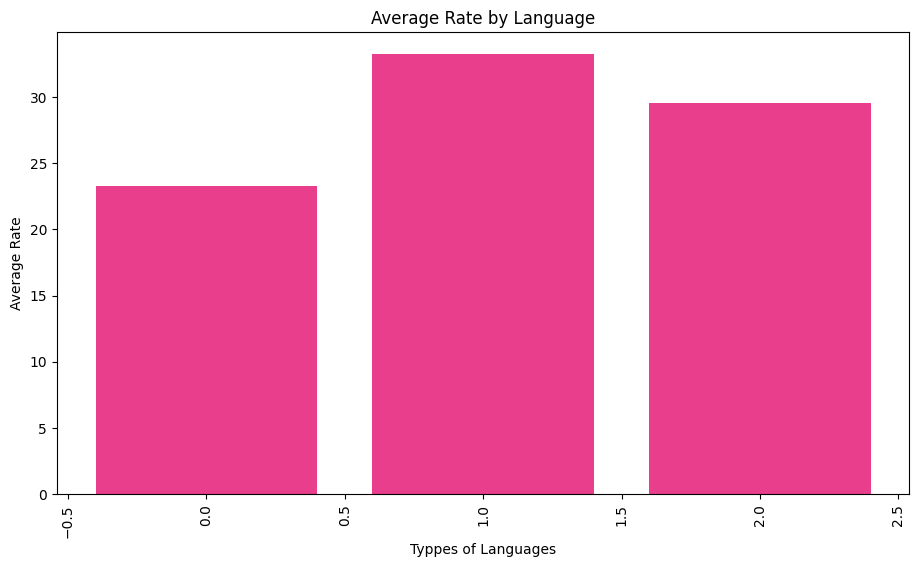

In [77]:
lang_classified = rcs.groupby('Language_Category')['Rate'].mean().reset_index()
plt.figure(figsize=(11, 6))
plt.bar(lang_classified['Language_Category'],lang_classified['Rate'], color=company_colors[2])
plt.title('Average Rate by Language')
plt.xlabel('Typpes of Languages')
plt.xticks(rotation='vertical')
plt.ylabel('Average Rate')
plt.show()

find avg count of insurace and category 

0 represents Hindi written in devnagri
1 represents Hindi written in English
2 represents Enlish written in english

Need customer data to know the average age group of user.